In [9]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy
import numpy as np

# Import the Pandas
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
# Split the data into training and Test Data
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [11]:
from sklearn.metrics import mean_squared_error
#Going to use mean squared error method
from sklearn.metrics import r2_score

In [12]:
advertising = pd.DataFrame(pd.read_csv('datasets/advertising for LR.csv'))

In [13]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


# **Data Inspection**

Data inspection referes to the process of examing data sets to ensure are they meet specific quality criteria and to identify any patterns, anomalies or issues that need to be addressed.

In [15]:
advertising.shape

(200, 4)

In [16]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# **Data cleaning**

In [18]:
# checking null values and present them as a precentage
advertising.isnull().sum()*100/advertising.shape[0]
# There are no null values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

**Outlier analysis**

Outlier are data points that differ significantly from other observation in a dataset.

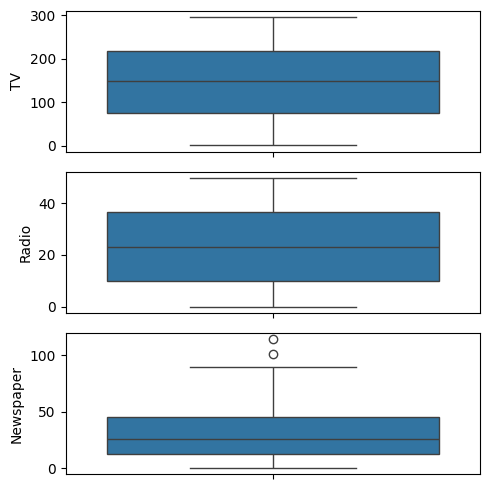

In [19]:
# Outlier analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Radio'], ax = axs[1])
plt3 = sns.boxplot(advertising['Newspaper'], ax = axs[2])
plt.tight_layout()
# automatically adjust the spacing between subplots to ensure that they
# fit within the figure area and don't overlap

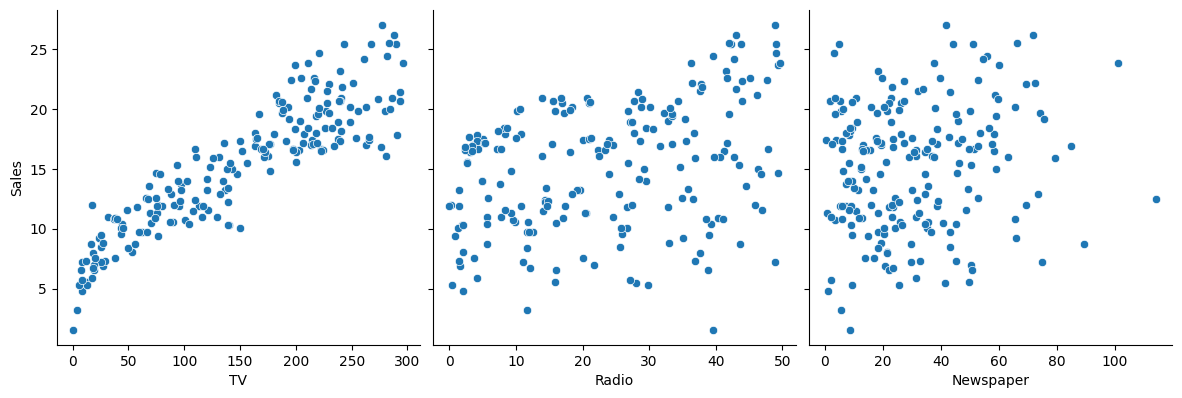

In [20]:
# Let's see how sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

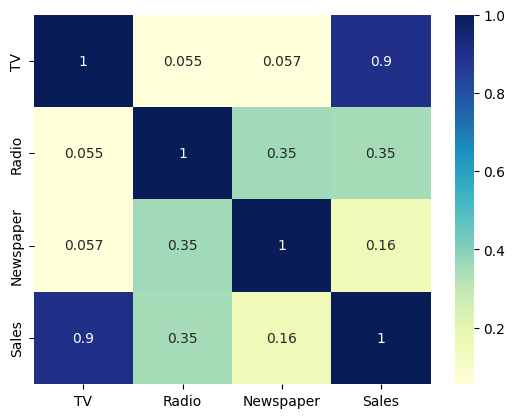

In [21]:
# Let's see the correlation between different variables
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Selecting data for dependant and Independant Variable**

In [22]:
# x = advertising[['TV', 'Radio', 'Newspaper']]
# x = advertising.drop(['Sales'], axis=1)
y = advertising['Sales']

In [23]:
x = advertising.iloc[:, :3] # we are selecting upto 3rd column for x. That means column 0,1,2
y = advertising.iloc[:, 3] # we are selecting the 3rd column only and all the rows of 3rd column

In [24]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [25]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [26]:
x = advertising.iloc[:, :3].values
y = advertising.iloc[:, 3].values # convert data frame into array

In [27]:
x #2D Array

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [28]:
y # 1D Array

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [29]:
train_test_split(x, y, train_size = 0.8, test_size=0.2) # validation set approch

[array([[166.8,  42. ,   3.6],
        [197.6,   3.5,   5.9],
        [281.4,  39.6,  55.8],
        [ 13.2,  15.9,  49.6],
        [241.7,  38. ,  23.2],
        [ 23.8,  35.1,  65.9],
        [ 75.3,  20.3,  32.5],
        [238.2,  34.3,   5.3],
        [ 85.7,  35.8,  49.3],
        [156.6,   2.6,   8.3],
        [ 69. ,   9.3,   0.9],
        [213.5,  43. ,  33.8],
        [222.4,   4.3,  49.8],
        [ 36.9,  38.6,  65.6],
        [230.1,  37.8,  69.2],
        [168.4,   7.1,  12.8],
        [250.9,  36.5,  72.3],
        [ 67.8,  36.6, 114. ],
        [276.9,  48.9,  41.8],
        [ 43.1,  26.7,  35.1],
        [109.8,  47.8,  51.4],
        [ 68.4,  44.5,  35.6],
        [ 75.5,  10.8,   6. ],
        [239.9,  41.5,  18.5],
        [225.8,   8.2,  56.5],
        [ 75.1,  35. ,  52.7],
        [292.9,  28.3,  43.2],
        [ 96.2,  14.8,  38.9],
        [104.6,   5.7,  34.4],
        [ 97.5,   7.6,   7.2],
        [262.9,   3.5,  19.5],
        [182.6,  46.2,  58.7],
        

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)
# split data into train & test Data

In [31]:
x_train

array([[197.6,  23.3,  14.2],
       [  5.4,  29.9,   9.4],
       [ 18.8,  21.7,  50.4],
       [ 36.9,  38.6,  65.6],
       [ 90.4,   0.3,  23.2],
       [ 23.8,  35.1,  65.9],
       [237.4,   5.1,  23.5],
       [243.2,  49. ,  44.3],
       [140.3,   1.9,   9. ],
       [ 80.2,   0. ,   9.2],
       [137.9,  46.4,  59. ],
       [ 13.2,  15.9,  49.6],
       [187.8,  21.1,   9.5],
       [  7.3,  28.1,  41.4],
       [214.7,  24. ,   4. ],
       [ 89.7,   9.9,  35.7],
       [  8.4,  27.2,   2.1],
       [ 57.5,  32.8,  23.5],
       [139.5,   2.1,  26.6],
       [280.2,  10.1,  21.4],
       [280.7,  13.9,  37. ],
       [290.7,   4.1,   8.5],
       [219.8,  33.5,  45.1],
       [ 73.4,  17. ,  12.9],
       [197.6,   3.5,   5.9],
       [266.9,  43.8,   5. ],
       [ 13.1,   0.4,  25.6],
       [ 66.9,  11.7,  36.8],
       [ 94.2,   4.9,   8.1],
       [ 19.4,  16. ,  22.3],
       [ 93.9,  43.5,  50.5],
       [  7.8,  38.9,  50.6],
       [238.2,  34.3,   5.3],
       [ 7

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state = 100)
# Split data into train & test Data
# Random state decide you will get the same value

In [33]:
# take a look at the train dataset
x_train

array([[215.4,  23.6,  57.6],
       [175.7,  15.4,   2.4],
       [164.5,  20.9,  47.4],
       [218.5,   5.4,  27.4],
       [120.2,  19.6,  11.6],
       [ 89.7,   9.9,  35.7],
       [ 16.9,  43.7,  89.4],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [ 38.2,   3.7,  13.8],
       [202.5,  22.3,  31.6],
       [171.3,  39.7,  37.7],
       [ 75.1,  35. ,  52.7],
       [131.1,  42.8,  28.9],
       [210.7,  29.5,   9.3],
       [ 44.5,  39.3,  45.1],
       [ 17.2,   4.1,  31.6],
       [ 25.6,  39. ,   9.3],
       [197.6,  23.3,  14.2],
       [ 85.7,  35.8,  49.3],
       [213.4,  24.6,  13.1],
       [151.5,  41.3,  58.5],
       [205. ,  45.1,  19.6],
       [142.9,  29.3,  12.6],
       [134.3,   4.9,   9.3],
       [ 80.2,   0. ,   9.2],
       [239.8,   4.1,  36.9],
       [ 88.3,  25.5,  73.4],
       [ 19.4,  16. ,  22.3],
       [225.8,   8.2,  56.5],
       [136.2,  19.2,  16.6],
       [ 25.1,  25.7,  43.3],
       [ 38. ,  40.3,  11.9],
       [17

In [34]:
x_test

array([[  7.8,  38.9,  50.6],
       [238.2,  34.3,   5.3],
       [135.2,  41.7,  45.9],
       [217.7,  33.5,  59. ],
       [241.7,  38. ,  23.2],
       [206.8,   5.2,  19.4],
       [139.2,  14.3,  25.6],
       [197.6,   3.5,   5.9],
       [216.4,  41.7,  39.6],
       [216.8,  43.9,  27.2],
       [117.2,  14.7,   5.4],
       [229.5,  32.3,  74.2],
       [ 56.2,   5.7,  29.7],
       [187.8,  21.1,   9.5],
       [ 87.2,  11.8,  25.9],
       [ 94.2,   4.9,   8.1],
       [149.7,  35.6,   6. ],
       [170.2,   7.8,  35.2],
       [163.5,  36.8,   7.4],
       [112.9,  17.4,  38.6],
       [214.7,  24. ,   4. ],
       [129.4,   5.7,  31.3],
       [195.4,  47.7,  52.9],
       [177. ,  33.4,  38.7],
       [184.9,  21. ,  22. ],
       [220.3,  49. ,   3.2],
       [219.8,  33.5,  45.1],
       [ 75.3,  20.3,  32.5],
       [184.9,  43.9,   1.7],
       [123.1,  34.6,  12.4],
       [ 68.4,  44.5,  35.6],
       [ 69. ,   9.3,   0.9],
       [121. ,   8.4,  48.7],
       [18

In [35]:
model = LinearRegression() # import Linear regression for the model

In [36]:
model.fit(x_train, y_train) # fit(allocate data) the linear regression

LinearRegression()

In [37]:
model.intercept_ #getting the intercept of the model

4.419176628968952

In [38]:
model.coef_ # getting the gradient values(slope)

array([0.05373662, 0.1061416 , 0.00542157])

In [39]:
y_pred = model.predict(x_test) # predict the prediction using the value

In [40]:
print(y_pred)

[ 9.24156185 20.88863168 16.35932288 19.99325582 21.56647985 16.18902526
 13.55593173 15.44101643 20.68858089 20.87635961 12.30666696 20.5823859
  8.2052026  16.8020073  10.49789975 10.04517517 16.27471961 14.58389375
 17.15124514 12.54217786 18.5255145  12.14739801 20.26906823 17.68550321
 16.70332653 21.47564231 20.03074293 10.79641986 19.02391131 14.77388184
 13.01107071  9.11899998 12.07692797 16.60311172  8.43700724 13.99646169
  9.96423595 14.29142558 16.80210584 17.11029489]


In [41]:
print(y_test)

[ 6.6 20.7 17.2 19.4 21.8 17.2 12.2 16.7 22.6 22.3 11.9 19.7  8.7 20.6
 10.6 14.  17.3 16.7 18.  11.9 17.4 11.  22.4 17.1 20.5 24.7 19.6 11.3
 20.7 15.2 13.6 11.3 11.6 19.9  8.4 14.2 13.2 16.7 16.5 20.2]


In [42]:
r_squared = r2_score(y_test, y_pred) #getting the R squared value for predicted data

In [43]:
r_squared

0.8296690596780841

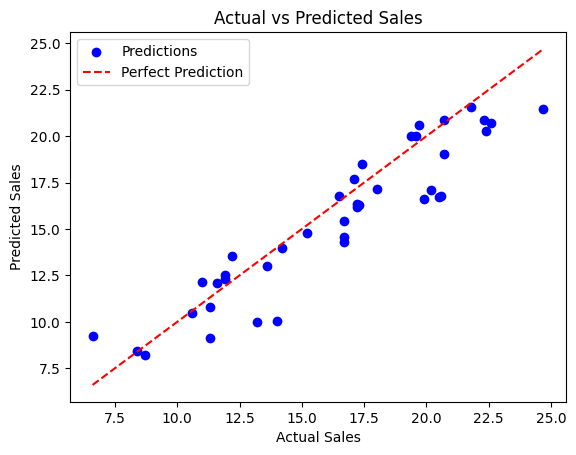

In [44]:
plt.scatter(y_test, y_pred, color = 'blue', label = 'Predictions')
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color = 'red', linestyle = '--', label = 'Perfect Prediction')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# **Finding Residuals and Compare**

In [45]:
residuals = y_test - y_pred # getting residuals

In [46]:
residuals

array([-2.64156185, -0.18863168,  0.84067712, -0.59325582,  0.23352015,
        1.01097474, -1.35593173,  1.25898357,  1.91141911,  1.42364039,
       -0.40666696, -0.8823859 ,  0.4947974 ,  3.7979927 ,  0.10210025,
        3.95482483,  1.02528039,  2.11610625,  0.84875486, -0.64217786,
       -1.1255145 , -1.14739801,  2.13093177, -0.58550321,  3.79667347,
        3.22435769, -0.43074293,  0.50358014,  1.67608869,  0.42611816,
        0.58892929,  2.18100002, -0.47692797,  3.29688828, -0.03700724,
        0.20353831,  3.23576405,  2.40857442, -0.30210584,  3.08970511])

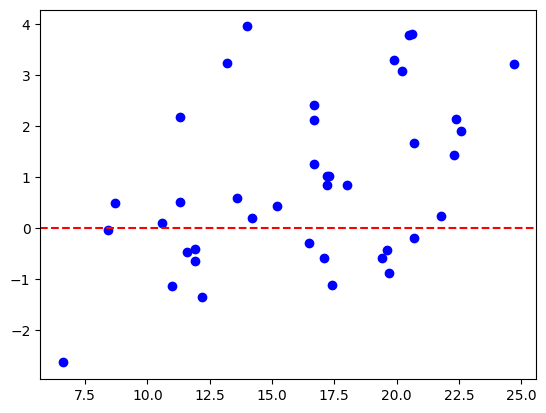

In [47]:
plt.scatter(y_test, residuals, color = 'blue', label = 'Residuals')
plt.axhline(y = 0, color = 'red', linestyle = '--') # add 0 line to compare residuals

In [48]:
MSE = mean_squared_error(y_test, y_pred)

In [49]:
MSE

3.350988721329179

In [50]:
RMSE = np.sqrt(MSE)

In [51]:
RMSE

1.8305705999303001

In [52]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Getting a Prediction**

In [53]:
arr = np.array([[230.1, 37.8, 69.2]]).reshape(1, 3)
# we have to convert this to 2D array as out data set is 2D
# This specifies that you want to reshape the original
# 1-dimentional array into a 2-dimentional array with 1 row and 3 columns
# The shape (1, 3) means 1 row and 3 columns
# This reshape the array into 1x3 matric (1 row and 3 columns). or can use (1,-1)

In [54]:
model.predict(arr)

array([21.17129883])

**KNN Regression**

In [55]:
x = advertising.iloc[:, :3] # we are selecting upto 3rd column for x. That means column 0,1,2
y = advertising.iloc[:, 3] # we are selecting the 3rd column only and all the rows of 3rd column

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)
# split data into train & test Data

In [58]:
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y_train)

KNeighborsRegressor()

In [59]:
y_pred = model.predict(x_test)

In [60]:
r_squared = r2_score(y_test, y_pred) #getting the R squared value for predicted data
r_squared

0.9400758521207799